In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

Text(0, 0.5, '특성 1')

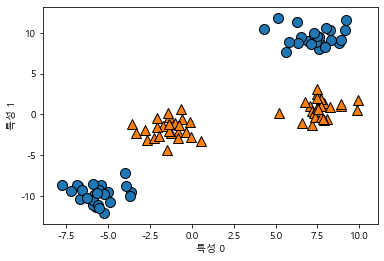

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

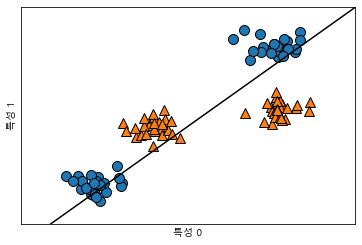

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 다음과 같은 그림은 직선으로만 나누기에는 한계가 있다.
- 이때 **feature를 추가해 차원을 확장**시켜보면 다음과 같다.

Text(0.5, 0, '특성 1 ** 2')

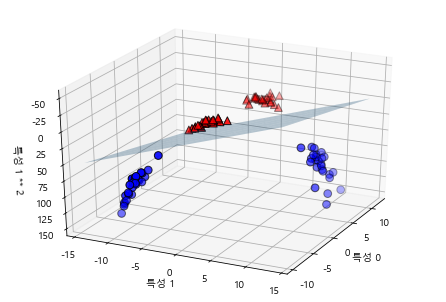

In [8]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

- 위의 그림을 하나의 평면에 정사영 시키면 다음과 같다.

Text(0, 0.5, '특성 1')

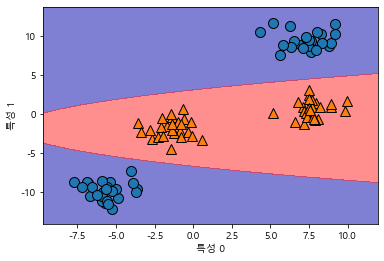

In [9]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

### Kernel

- 보통은 위와 같이 특성을 만들지 않고도 고차원에서 분류기를 학습 시킬 수 있는데 이를 **커널 기법**이라고 한다.
- **SVM에서 자주 사용되는 `Kernel`**
    - **다항식 커널** : 현재 feature로 가능한 조합을 지정된 차수까지 계산
        - $k(x_1, x_2) = (\gamma(x_1^Tx_2) + \theta)^d$
    - **RBF**(radial basis functino) : 가우시안 커널
        - 모든 차수의 모든 다항식을 고려한다고 이해하면 된다.
        - $k(x_1, x_2) = exp(-\gamma||x_1 - x_2||^2)$

### SVM

- **SVM : 두 클래스 간의 결정 경계를 구분해주는 모델**
- **서포트 벡터 : 두 클래스 사이의 경계에 위치한 데이터 포인트**

Text(0, 0.5, '특성 1')

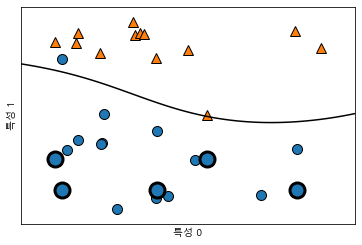

In [10]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv_labels, s = 15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### SVM 파라미터

#### 1) $\gamma$

- 가우시안 커널 폭의 역수에 해당한다.
- **gamma 변수가 하나의 훈련 샘플에 미치는 영향의 범위를 결정**
- gamma 값이 클수록 영향이 미치는 범위가 줄어든다.

#### 2) $C$

- 선형 모델에서 사용한것과 비슷한 **규제 매개변수**
- **각 포인트의 중요도를 제한**
- C값이 커질수록 중요도가 줄어든다.

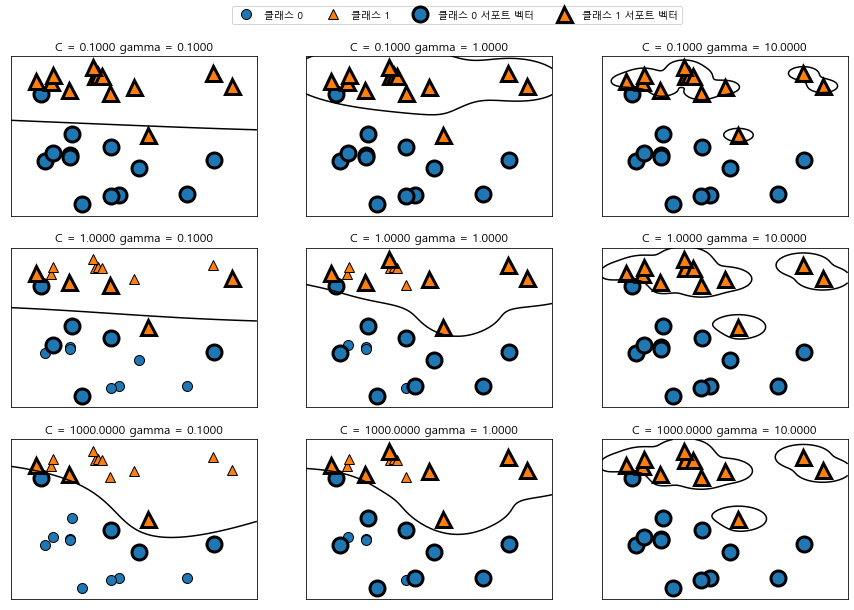

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]) :
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"], ncol=4, loc=(.9, 1.2))

### 장단점

#### 장점

> - 매우 강력한 모델이며, 다양한 데이터셋에서 잘 작동한다.
- 데이터의 특성이 몇개 안되더라도 복잡한 결정 경계를 만들 수 있다.

#### 단점

> - 대략 10만개 이상의 데이터셋에는 잘 작동하지 않는다.
- 스케일에 민감해 전처리가 필요하다.